<a href="https://colab.research.google.com/github/SNWambui/Capstone_Projects/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization and Keyword Extraction

The goal of this project is multi-part:
1. To get experience in outsourcing and collecting data for data related projects from the web. 
2. To explore natural language processing as a machine learning technique as we did not cover this in class
3. To set up the foundation in learning more about agriculture in Kenya, common topics and conditions for a set of crops in support of my capstone.
4. To make use of pretrained models in addition to building new models for language processing.

## Web Scraping and Data consolidation

With the goal being to learn about data collection methods, I am going to scrape data from a few websites that have agricultural content about crops and compile them into one file or multiple files depending on the content. The other reason is that there is not a well consolidated and accessible dataset of farming conditions in Kenya. Rather, there are several websites that either have paragraphs or list the conditions out in paragraphs. I will use BeautifulSoup which is a common scraping tool that allows various web formats. The documentation, found [here](https://beautiful-soup-4.readthedocs.io/en/latest/) is very detailed. Note that one needs to install beautifulsoup and requests locally to run it

### Importing Necessary Modules

In [7]:
# !pip3 install beautifulsoup4
# !pip3 install requests
# !pip3 install lxml
# !pip3 install icecream

In [8]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import requests
import seaborn as sns
from icecream import ic

In [3]:
sns.set_theme()

Every website has it's own structure and therefore it is important to visit the website, know what you are looking for, inspect the elements and get the respective HTML/XML tags. Since most websites use HTML to display static contents, it becomes relatively easy to get the content so long as it is publicly rendered. Beautifulsoup makes the process seamless.

I will use only three websites with the aim of only getting information about maize as a factor of time and scope of the assignment. Maize is a staple food in Kenya and so it makes sense to start with it. The idea is that eventually, enough data on the main crops in Kenya can be added to a database and the key topics can emerge. This can then be used to provide recommendations to farmers as there is evidence for success:
1. The first website contains information on growing conditions for maize in Kenya. 
2. The second website contains information on general cash crop growing and is an education site target to students.
3. The third website contains very detailed information on everything to know about maize

For the first website, the content is rather short and therefore getting all the content that is in paragraphs. 

In [ ]:
# define the url to get the content from
url1 = "https://www.koppert.co.ke/news/some-tips-for-maize-production-in-challenging-times/#:~:text=Fertile%2C%20well%20drained%2C%20well%20aerated,pH%206.0%E2%80%936.5%20being%20optimal."

# send a request to get contents from the url
maize1 = requests.get(url1)

# use lxml in case pages are not correctly formatted as per HTML standards
soup1 = BeautifulSoup(maize1.content, 'lxml')

# get the content in the div with the paragraphs, and each paragraph
parags = soup1.find('div', class_ = 'c-news__bodytext').find_all("p")



In [ ]:
# create a dataframe to story any scapred data
df_all = pd.DataFrame(columns=['Crops', 'Website', 'Content'])

# get each of the paragraphs within the div, add them to a list with the crop name
# and display the paragraphs
lst1 = []
for p in parags:
    lst1.append(p.get_text())
    
# combine the paragraphs into one paragraph and remove weird characters
cont = ' '.join(lst1).replace('\xa0', '')
df_all.loc[0] = ['Maize', 'Koppert', cont]

In [ ]:
df_all

,Crops,Website,Content
0,Maize,Koppert,The Kenya Meteorological Department has predic...


In [ ]:
#@title
df_all['Content'].values

array(['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail. As a result, the long rains growing season that usually starts in March and ends in May will be delayed. Whether this is just a cyclical pattern or the result of climate change is a subject for a separate debate. The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields. Maize is undoubtedly the primary staple food in Kenya. Any factor that influences maize yields is therefore of key concern to farmers. Extraneous factors such as weather patterns notwithstanding, it is important for maize farmers to pay attention to all the good standard practices needed for optimum production. Firstly, the farmer needs to understand their agro ecological zone. This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice. At this juncture, the farme

For the second website, I am only interested in the paragraph that talks about maize conditions. It does not follow updated website standards and therefore finding the exact content will require a bit more manual filtering and using 'html.parser' rather than XML. I had to do quite a bit of inspecting the HTML elements, loop through all the paragraphs and find the ones where the start talking about maize.

In [9]:
# url to get content from
url2 = "https://learn.e-limu.org/topic/view/?c=48&t=272"

# send a request to get contents from the url
maize2 = requests.get(url2)

# use lxml in case pages are not correctly formatted as per HTML standards
soup2 = BeautifulSoup(maize2.content, 'html.parser')

# get the content in the div with the paragraphs, and each paragraph
parags2 = soup2.find_all('p')

text = 'Maize growing in'
for i in parags2:
    if text in i.text:
        maize_text = i.text
ic(maize_text)

ic| maize_text: ('Cotton growing in Kenya
                '
                 'Cotton is grown to produce cotton balls. Conditions necessary for growing '
                 'cotton;
                '
                 '
                '
                 'Moderate rainfall.
                '
                 'An average temperature of 27ºC.\xa0
                '
                 'Fertile and well drained black cotton soil.\xa0
                '
                 'A dry spell for ripening and harvesting. A lot of rain destroys the cotton '
                 'balls.
                '
                 '
                '
                 'The main cotton growing areas in Kenya are Siaya, Homa Bay, Tana river and '
                 'Machakos.
                '
                 '
                '
                 'Uses of cotton
                '
                 'a) It is used in textile industries to make clothes, blankets and towels.
                '
                 'b) It is used in hospi

'Cotton growing in Kenya\nCotton is grown to produce cotton balls. Conditions necessary for growing cotton;\n\nModerate rainfall.\nAn average temperature of 27ºC.\xa0\nFertile and well drained black cotton soil.\xa0\nA dry spell for ripening and harvesting. A lot of rain destroys the cotton balls.\n\nThe main cotton growing areas in Kenya are Siaya, Homa Bay, Tana river and Machakos.\n\nUses of cotton\na) It is used in textile industries to make clothes, blankets and towels.\nb) It is used in hospitals when dressing wounds.\nc) Cotton stalks are used as fi rewood.\nd) Cotton stalks and leaves are used in compost heaps to make manure.\nFactors influencing the growing of cash crops\n\nThe type of soil.\nAvailability of labour.\nA,mount of rainfall received\nTemperatures of a place\nAbsence of pests and diseases.\nTopography.\nAvailability of capital\nGood transport network.\n\nMaize growing in Kenya and Tanzania\nMaize is an important food crop in Eastern Africa. However, in some areas, 

In [ ]:
# slice out anything that comes before the first instance of maize in the text
maize_text = maize_text[maize_text.find('Maize'):]

# delete strange characters
maize_text = maize_text.replace('\xa0', '')

The output above is a good example of how even with webscraping, you still need to do cleaning to get the exact content we need because people do not follow the same practices for organizing content. The only important sections are the ones that come after "Conditions for growing maize". Everything else can be deleted. While it is possible to delete

In [ ]:
# add the contents of the new website to the dataframe
df_all.loc[1] = ['Maize', 'Elimu', maize_text]

In [ ]:
df_all

,Crops,Website,Content
0,Maize,Koppert,The Kenya Meteorological Department has predic...
1,Maize,Elimu,Maize growing in Kenya and Tanzania\nMaize is ...


In [ ]:
https://infonet-biovision.org/PlantHealth/Crops/Maize

## Topic Modeling

I will make use of Term Freqeuency Inverse Documemnt Frequency (TF IDF). This refers to how many times a word appears in a document and how important it is as measured by the share of sentences with the word in it. For keyword search, we need to process the text in several steps:
1. Tokenization. This refers to splitting sentences into the simplest forms that is words and phrases
2. Removing stop words. Stop words are words that are useful for semantic reasons but do not add meaning to the text eg 'the', 'a', 'and'
3. Calculating Term Frequency. This will count how many times a word appears in the text
4. Calculting IDF. This will check the share of each word in the sentences

### Importing Necessary Libraries

In [ ]:
# !pip3 install gensim


In [ ]:
from operator import itemgetter
import math
import matplotlib.pyplot as plt

import nltk
# for removing stopwords and tokenizing words
nltk.download('stopwords')

# for dealing with punctuations
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# remove stop words from sentences 
stop_words = set(stopwords.words('english'))

In [ ]:
# plot the distribution of words

In [ ]:
def n_words(text, n=-1):
    '''Function to get n number of tokenized words from a given blob of text
    Input:
     str (text): Text to be tokenized
     int (n): number of words to return after tokenizing text
     default: -1, shows all the sentences
    Output:
     str: n number of tokenized words
    '''
    token_words = word_tokenize(text.lower())[:n]
    return token_words

In [ ]:
# for computing TF, get all the words
total_words1 = n_words(df_all["Content"][0])
word_length1 = len(total_words1)
print(f"Total number of words is : {word_length1}")
print(f"last 10 words: {total_words1[668:]}")

Total number of words is : 678
last 10 words: ['opportunity', 'to', 'wish', 'all', 'maize', 'farmers', 'a', 'highly', 'productive', 'season']


In [ ]:
# for computing TF, get all the words
total_words2 = n_words(df_all["Content"][1])
word_length2 = len(total_words2)
print(f"Total number of words is : {word_length2}")
print(f"last 10 words: {total_words2[512:]}")

Total number of words is : 522
last 10 words: ['or', 'stored', 'as', 'reserve', 'for', 'use', 'in', 'times', 'of', 'famine']


In [ ]:
def n_sentens(text, n=-1):
    '''Function to get n number of tokenized sentences from a given blob of text
    n=-1 to see all the sentences.
    Input:
        str (text): Several sentences to be tokenized
        int (n): number of sentences to return after tokenizing text
            default: -1, shows all the sentences
    Output:
        str (sent_print): n number of tokenized sentences for print display
        array (token_sent): list with n number of tokenized sentences
    '''
    token_sent = sent_tokenize(text)[:n]
    sent_print = "\n".join(sent_tokenize(text)[:n])
    return token_sent, sent_print

In [ ]:
token_sent10, print_sent10 = n_sentens(df_all["Content"][0],10)

In [ ]:
print(f"First 10 sentences:\n{print_sent10}")

First 10 sentences:
The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.
As a result, the long rains growing season that usually starts in March and ends in May will be delayed.
Whether this is just a cyclical pattern or the result of climate change is a subject for a separate debate.
The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields.
Maize is undoubtedly the primary staple food in Kenya.
Any factor that influences maize yields is therefore of key concern to farmers.
Extraneous factors such as weather patterns notwithstanding, it is important for maize farmers to pay attention to all the good standard practices needed for optimum production.
Firstly, the farmer needs to understand their agro ecological zone.
This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice.
At this junctur

In [ ]:
token_sent10

['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.',
 'As a result, the long rains growing season that usually starts in March and ends in May will be delayed.',
 'Whether this is just a cyclical pattern or the result of climate change is a subject for a separate debate.',
 'The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields.',
 'Maize is undoubtedly the primary staple food in Kenya.',
 'Any factor that influences maize yields is therefore of key concern to farmers.',
 'Extraneous factors such as weather patterns notwithstanding, it is important for maize farmers to pay attention to all the good standard practices needed for optimum production.',
 'Firstly, the farmer needs to understand their agro ecological zone.',
 'This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice.',

In [ ]:
# #print(f"last 10 words: {total_sent1[668:]}")
# for i in df_all['Content']:
#     total_sent += sent_tokenize(i)
# sent_length = len(total_sent)
# print(f"Total number of sentences is : {sent_length}")
# print(f"First 10 sentences: {total_sent[:9]}")

In [ ]:
# for computing IDF,  get all the sentences
total_sent1, print_total_se = n_sentens(df_all["Content"][0])
sent_length1 = len(total_sent1)
print(f"Total number of sentences is : {sent_length1}")

Total number of sentences is : 36


In [ ]:
# second website
# for computing IDF,  get all the sentences
total_sent2, print_total_se2 = n_sentens(df_all["Content"][1])
sent_length2 = len(total_sent2)
print(f"Total number of sentences is : {sent_length2}")
print(f"First 10 sentences: {total_sent2[:9]}")

Total number of sentences is : 35
First 10 sentences: ['Maize growing in Kenya and Tanzania\nMaize is an important food crop in Eastern Africa.', 'However, in some areas, it is grown as a cash crop.', 'Maize was introduced to Kenya by Portuguese.', 'It is mainly produced on small farms, which vary in size from a quarter hectare to about fi ve hectares.', 'In some cases it is grown on large plantations.', 'Conditions necessary for growing maize\na) Over 500 mm of rainfall.', 'Therefore, it does not do well in desert and semi-desert\nareas.', 'b) Maize does not do well in highland areas above 2 200 metres where temperatures are very low.', 'In such areas, maize grows very slowly and takes more than six months to mature.']


#### Plotting Total Words 

Before computing the tf and IDF scores, we can plot the frequency distribution of total tokenized words. These will contain stop words and punctuation marks which are removed in computing the TF IDF

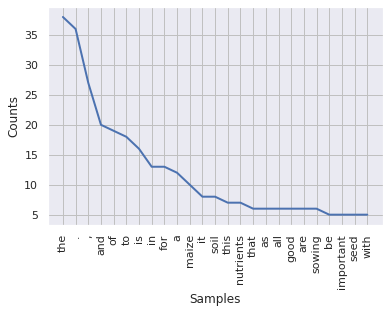

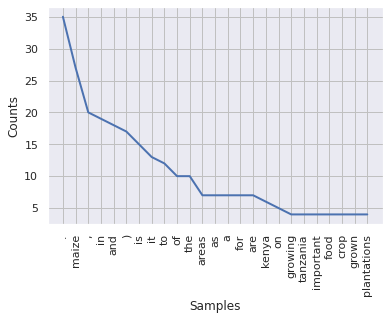

In [ ]:
# Figures inline
%matplotlib inline

# Create freq dist and plot
freqdist1 = nltk.FreqDist(total_words1)
freqdist2 = nltk.FreqDist(total_words2)
freqdist1.plot(25)
freqdist2.plot(25);

It is evident that to get a better representation, stop words and punctuations need to be removed. 

In [ ]:
# computing the tf score
def compute_tf_score(tot_words):
    '''
    Function to compute the term frequency score for the words
    Input:
        arr (tot_words): list of the tokenized words generated
    Output:
        dict (tf_score): key/value pair of word and it's tf score
    '''
    # empty dict to store the term frequency score
    tf_score = {}

    # loop through, remove all punctuations
    for word in tot_words:
        word = word.replace('.','')
        word = word.replace(',','')
        word = word.replace('’','')
        word = word.replace('‘','')

        # if the word in a stop word, 
        # then get it's tf_score and add it to the dict
        if word not in stop_words:
            if word in tf_score:
                tf_score[word] += 1
            else:
                tf_score[word] = 1
                
    # divide by word_len for each dic element
    word_len = len(tot_words)
    tf_score.update((x, y/int(word_len)) for x, y in tf_score.items())
    return tf_score

# tf score for the first website
tf_score1 = compute_tf_score(total_words1)
print(list(tf_score1.items())[:10])

[('kenya', 0.0029498525073746312), ('meteorological', 0.0014749262536873156), ('department', 0.0014749262536873156), ('predicted', 0.0014749262536873156), ('current', 0.0014749262536873156), ('dry', 0.0014749262536873156), ('hot', 0.0014749262536873156), ('conditions', 0.0029498525073746312), ('country', 0.0014749262536873156), ('continue', 0.0014749262536873156)]


In [ ]:
# tf score for the second website
tf_score2 = compute_tf_score(total_words2)
print(list(tf_score2.items())[:10])

[('maize', 0.05172413793103448), ('growing', 0.007662835249042145), ('kenya', 0.011494252873563218), ('tanzania', 0.007662835249042145), ('important', 0.007662835249042145), ('food', 0.007662835249042145), ('crop', 0.007662835249042145), ('eastern', 0.0019157088122605363), ('africa', 0.0019157088122605363), ('', 0.1053639846743295)]


In [ ]:
# combining words from both websites
total_words_all = total_words1 + total_words2

In [ ]:
# tf score for the second website
tf_score_all = compute_tf_score(total_words_all)
print(list(tf_score_all.items())[:10])

[('kenya', 0.006666666666666667), ('meteorological', 0.0008333333333333334), ('department', 0.0008333333333333334), ('predicted', 0.0008333333333333334), ('current', 0.0008333333333333334), ('dry', 0.0025), ('hot', 0.0008333333333333334), ('conditions', 0.0025), ('country', 0.0025), ('continue', 0.0008333333333333334)]


In [ ]:
# calculating IDF

def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

In [ ]:
from string import punctuation
# computing the idf score
def compute_idf_score(tot_words, tot_sent):
    '''
    Function to compute the inverse document frequency score for the words
    Input:
        arr (tot_words): list of the tokenized words generated
        arr (tot_sent): list of all the tokenized sentences
    Output:
        dict (idf_score): key/value pair of word and it's tf score
    '''

    # initialize empty dict to compute IDF
    idf_score = {}

    # remove punctuations for all the words
    for word in tot_words:
        word = word.replace('.','')
        word = word.replace(',','')
        word = word.replace('’','')
        word = word.replace('‘','')
        word = word.replace('(','')
        word = word.replace(')','')
        
        # if the word is not a stop_word, compute the IDF score and append to dict
        if word not in stop_words:
            if word in idf_score:
                idf_score[word] = check_sent(word, tot_sent)
            else:
                idf_score[word] = 1

    # get the length of the list of sentences
    sent_len = len(tot_sent)
    
    # Performing a log and divide
    idf_score.update((x, math.log(int(sent_len)/y)) for x, y in idf_score.items())

    return idf_score

# idf score for first website
idf_score1 = compute_idf_score(total_words1, total_sent1)
print(list(idf_score1.items())[:10])

[('kenya', 2.8903717578961645), ('meteorological', 3.58351893845611), ('department', 3.58351893845611), ('predicted', 3.58351893845611), ('current', 3.58351893845611), ('dry', 3.58351893845611), ('hot', 3.58351893845611), ('conditions', 0.36464311358790924), ('country', 3.58351893845611), ('continue', 3.58351893845611)]


In [ ]:
# idf score for second website
idf_score2 = compute_idf_score(total_words2, total_sent2)
print(list(idf_score2.items())[:10])

[('maize', 0.5108256237659907), ('growing', 0.9162907318741551), ('kenya', 3.5553480614894135), ('tanzania', 0.4643056081310978), ('important', 0.7827593392496325), ('food', 0.41985384556026406), ('crop', 0.9162907318741551), ('eastern', 3.5553480614894135), ('africa', 3.5553480614894135), ('', 0.0)]


In [ ]:
# compute tfidf
tf_idf_score1 = {key: tf_score1[key] * idf_score1.get(key, 0) for key in tf_score1.keys()}
print(list(tf_idf_score1.items())[:10])

[('kenya', 0.008526170377274822), ('meteorological', 0.005285426162914616), ('department', 0.005285426162914616), ('predicted', 0.005285426162914616), ('current', 0.005285426162914616), ('dry', 0.005285426162914616), ('hot', 0.005285426162914616), ('conditions', 0.0010756434029141864), ('country', 0.005285426162914616), ('continue', 0.005285426162914616)]


In [ ]:
# compute tfidf
tf_idf_score2 = {key: tf_score2[key] * idf_score2.get(key, 0) for key in tf_score2.keys()}
print(list(tf_idf_score1.items())[:10])

[('kenya', 0.008526170377274822), ('meteorological', 0.005285426162914616), ('department', 0.005285426162914616), ('predicted', 0.005285426162914616), ('current', 0.005285426162914616), ('dry', 0.005285426162914616), ('hot', 0.005285426162914616), ('conditions', 0.0010756434029141864), ('country', 0.005285426162914616), ('continue', 0.005285426162914616)]


#### Top n Words

Now that we have the computed the term frequency and inverse document frequency, we can see which are the top words per website and see if any new patterns emerge. We can plot them for better visualization and even have a wordcloud to visually represent them better.

In [ ]:
def get_top_n(tfidf_score, n):
    '''Function to get the top n words/important words
    Input:
        dict (dict_elem): dictionary containing tf_idf_scores
        int (n): number of top words to get
    Output:
        dict: the top n words by their tfidf scores
        
    '''
    result = dict(sorted(tfidf_score.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

In [ ]:
# get the top n number of words for first website
topn1 = get_top_n(tf_idf_score1, 15)
print(topn1)

{'maize': 0.018892829579086494, 'kenya': 0.008526170377274822, 'requires': 0.006481488428720411, 'meteorological': 0.005285426162914616, 'department': 0.005285426162914616, 'predicted': 0.005285426162914616, 'current': 0.005285426162914616, 'dry': 0.005285426162914616, 'hot': 0.005285426162914616, 'country': 0.005285426162914616, 'continue': 0.005285426162914616, 'prevail': 0.005285426162914616, 'long': 0.005285426162914616, 'usually': 0.005285426162914616, 'starts': 0.005285426162914616}


In [ ]:
# get the top n number of words for second website
topn2 = get_top_n(tf_idf_score2, 15)
print(topn2)

{'kenya': 0.04086606967229211, 'maize': 0.02642201502237883, 'requires': 0.012465825864192662, 'large-scale': 0.009412780738778942, 'ncpb': 0.00831055057612844, 'growing': 0.0070213849185759005, 'crop': 0.0070213849185759005, 'grown': 0.0070213849185759005, 'plantations': 0.0070213849185759005, 'eastern': 0.006811011612048685, 'africa': 0.006811011612048685, 'however': 0.006811011612048685, 'cash': 0.006811011612048685, 'introduced': 0.006811011612048685, 'portuguese': 0.006811011612048685}


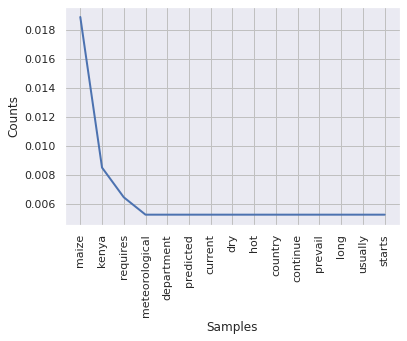

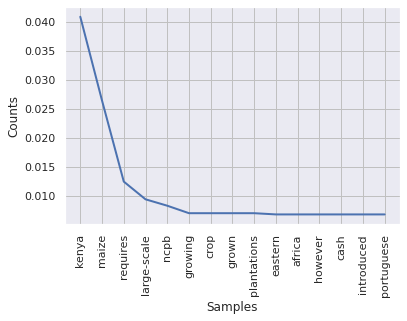

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(topn1)
freqdist2 = nltk.FreqDist(topn2)
freqdist1.plot(25)
freqdist2.plot(25);

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
#!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS


In [ ]:
# get the top x number of words
top_x1 = [i for i in topn1.keys()]

# Generate word cloud
wordcloud1 = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(str(top_x1))

In [ ]:
# get the top x number of words)
top_x2 = [i for i in topn2.keys()]

# Generate word cloud
wordcloud2 = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Paired', 
                      collocations=False, stopwords = STOPWORDS).generate(str(top_x2))

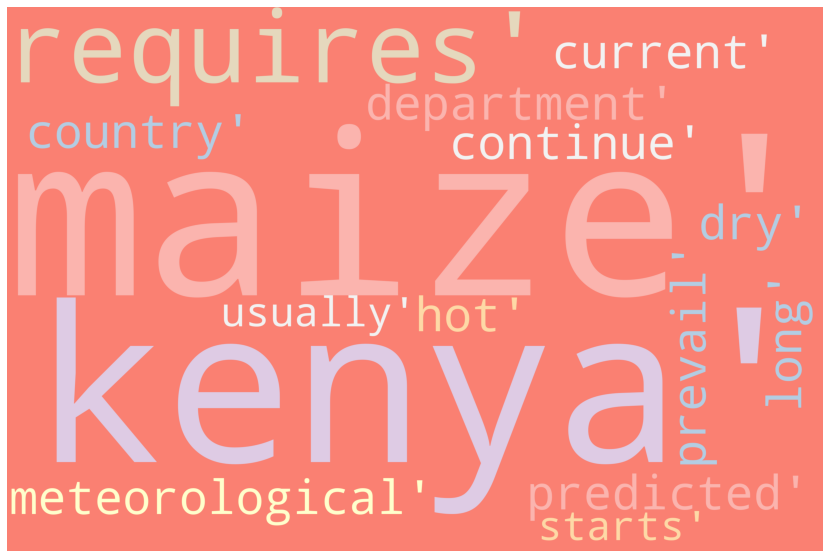

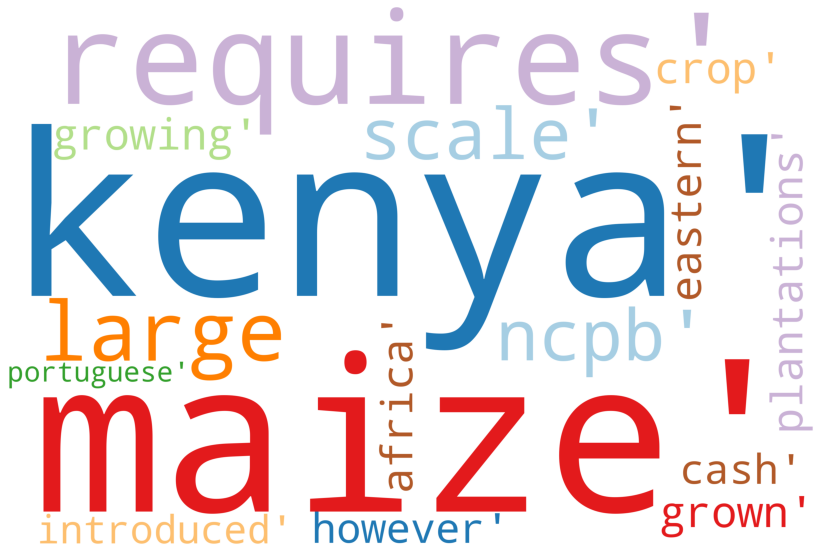

In [ ]:
plot_cloud(wordcloud1)
plot_cloud(wordcloud2)

Unsurprisingly, Kenya and maize are among the top words in the websites. An interesting observation is that requires is also a top word which means that we can use this as a basis to extract useful summary using requires as a keyword. It may be used to directly refer to the crop requirements. 

## Summarization

With summarization being a relatively new area of machine learning, there is no one fits all model that can summarize text best. This is a general text in machine learning where though certain algorithms/models are known to work well for certain situations, it is always a good idea to try different algorithms that also work to see which is best. Therefore I will try several models and check their summarization.

The second problem with summarization is that it's harder to compute metrics because we are comparing a summary to the original text. This is where `rouge_score` comes in handy. In an ideal situation, we would have a human generated summary of the text and compare that to the ML generated summary. The `rouge_score` on these two summaries would compare the precision, recall and f1 and determine how close the model came to providing a succint summary. For this case however, we do not have a human generated summary. Instead, we can get the first and last tokenized sentences of the unsummarized text and compare that with the fast and last sentences of the summary given that they are similar sentences. We can then use this score to check which model performs best. 

For the best performing model, I will tune the hyperparameters. I am also curious to see the difference in summarization for entire paragraphs vs tokenized sentences. My suspicion is that entire paragraph summarization will have a better flow to a ready. 

There are two types of summarizations I am interested in:
1. Abstractive Summarization: This type of summarization, as the name suggests, gives an abstract of the text and may include rewriting some of the text to be less verbose and more coherent. This is useful to someone who wants to get a basic gist of what the website content is
2. Extractive Summarization: This type of summarization is useful for extracting the most useful pieces of information from text. It can be based on getting the text with the most common non-stop words or getting text with specific keywords. This is useful when someone is looking for specific things such as the temperature for a given crop.

### Abstractive Summarization

Anyone who has done anything related to abstractive text summarization knows that one of the very first go to approaches is to use the Encoder-Decoder LSTM (Long Short Term Memory) model which is a type of Recurrent Neural Network. Specifically, they make use of encoders and decoders to understand text and provide summaries. The encoders work by having an internal, often vector, representation of words that is fed into the neural network to obtain a summary based on analysis of words one by one. It therefore 'remembers' whether a word is important or not based on the connections between the previous state. Under the hood, it uses the markov chain concept and words that are kept in the sequence are determined by a probability of importance based on their dependencies. The Network then keeps a memory of this dependencies over many words and therefore is long-term. The decoder on the other hand takes the output of the network and using a mapping based on the encoder, converts the internal vector representation back into text that is legible. The limitation of the LSTM is that it is sequential and only checks the importance of words sequentially. This means that it does not get the context of the entire sentence at a go. An additional step of using Attention helps to try and resolve this (I discuss more on attention below). Additionally, it works best if it has reference point of an expected summary to produce.

With that said, we want people to get useful summaries and we are scraping data which does not have prewritten summaries. Therefore I will use Transformers with pretrained models. Transformers are a clever adaptation of the LSTM models described above. They make use of convolutional neural networks, self-attention and encoder-decoders to give a coherent summary that maintains the message fo the text. Internally, transformers have encoders and decoders that work in tandem with self-attention layers. The self-attention is a property that is multi-step that allows embedding of words into vectors, determining the importnace of words not just as dependent on the previous word but as a component of the entire sentence. This non-sequential factor allows the vectorized words to be assigned a score of importance and given a probability that determines whether or not it is relevant. This works in parallel across sentences to determine which words have clear significance so that they can be decoded and returned as output in a new paraphrased summary. Lastly, they use positional encodings which gives information about the relationship between words based on their positions in the vector space represenation and consequently in the document. Just like the objective of the abstractive summarization, my discussion of how LSTM, BERT and Transformers is an abstract in itself and leaves out a lot details but delivers the key ideas of the models. 

Another important thing to note is that for LSTM, I would define the neural networks, encoders and decoders from scratch ie with keras while for Transformers, I will use pre-trained models and finetune the best performing. 

I will use the following transformers:
1. BERT: this is bidirectional encoder representations from transformers. It is the fundamental definition of transformers. While bidirectional may imply it reads text left to right then right to left, it actually means that it is non-directional, that is it reads the entire sequence of words at a go. This makes it good for summarization.  
2. GPT2: this is Generative Pre-trained Transformer 2. It is mainly for text generation based on the previous context of the words in the sequence. It works for abstractive summarization because we want to generate a new shorter summary that captures the essence of text based on the context.
3. BART: This is a generalization of BERT and GPT2 which was pretrained on CNN news articles with the intention of providing summaries by the model learning to reconstruct the original text. 
4. T5: This is an encoder-decoder model pre-trained on supervised and unsupervised tasks and makses use of the power of transfer learning. 
5. XLNet: 

In [ ]:
# !pip3 install spacy -U
# !pip3 install Sentencepiece -U
# !pip3 install huggingface transformers -U
# !pip3 install transformers
# !pip3 install bert-extractive-summarizer -U
# !pip3 install icecream
# !pip3 install torch -U

In [ ]:
# from transformers import Seq2SeqTrainingArguments

In [ ]:
from summarizer import Summarizer, TransformerSummarizer

In [ ]:
content1 = df_all['Content'][0]
content2 = df_all['Content'][1]

In [ ]:
from transformers import pipeline 
from icecream import ic

In [ ]:
bert_list1 = []

# default is bert-large-uncased
bert_model1 = Summarizer()

bert_summary1 = ''.join(bert_model1(str(total_sent1), min_length=60))
bert_list1.append(bert_summary1)
#bert_summary = (bert_model(body, min_length=60))
ic(bert_list1)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
ic| bert_list1: ["['The Kenya Meteorological Department has predicted that the current dry and "
                 "hot conditions in the country will cont

["['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice.', ' At this juncture, the farmer needs to understand the soil characteristics prevalent in their field.', ' Maize is a nutrient intensive and requires adequate supplies of all nutrients for all growth stages.', ' Soil testing helps establish the available nutrients and the remedial steps that need to be undertaken in case of deficiencies.', ' Commercially acquired certified seeds are as a standard practice dressed with a fungicide and an insecticide to prevent diseases and insects respectively.', ' This improves nutrient and water use efficiency, resulting in a healthy resilient crop able to achieve higher yields.', '"]

In [ ]:
bert_list2 = []

# default is bert-large-uncased
bert_model2 = Summarizer()

bert_summary2 = ''.join(bert_model2(str(total_sent2), min_length=60))
bert_list2.append(bert_summary2)
#bert_summary = (bert_model(body, min_length=60))
ic(bert_list2)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
ic| bert_list2: ["['Maize growing in Kenya and Tanzania\
                Maize is an important food crop in "
                 "Eastern Africa.', ' Where 

["['Maize growing in Kenya and Tanzania\\nMaize is an important food crop in Eastern Africa.', ' Where soils are poor, it requires manure or fertiliser to be\\nadded.', e) It needs plenty of labour during planting, weeding and harvesting.', ' Maize growing in Tanzania\\nAlmost every family in Tanzania grows maize.', ' Large-scale maize plantations are found around Arusha, Morogoro, Dodoma and along the shores of Lake Victoria.', '"]

In [ ]:
GPT2_model1 = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
gpt_summary1 = ''.join(GPT2_model1(str(total_sent1), min_length=60))
ic(gpt_summary1)

ic| gpt_summary1: ("['The Kenya Meteorological Department has predicted that the current dry and "
                   "hot conditions in the country will continue to prevail.', ' As a result, the "
                   'long rains growing season that usually starts in March and ends in May will '
                   "be delayed.', ' At this juncture, the farmer needs to understand the soil "
                   "characteristics prevalent in their field.', ' Fertile, well drained, well "
                   "aerated and good textured soil is able to supply these nutrients.', ' "
                   'Commercially acquired certified seeds are as a standard practice dressed '
                   'with a fungicide and an insecticide to prevent diseases and insects '
                   "respectively.', ' In addition, the correct sowing depth will ensure uniform "
                   "emergence and good plant population.', ' Maize also requires ‘booster "
                   "nitrogen’ over the growin

"['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' As a result, the long rains growing season that usually starts in March and ends in May will be delayed.', ' At this juncture, the farmer needs to understand the soil characteristics prevalent in their field.', ' Fertile, well drained, well aerated and good textured soil is able to supply these nutrients.', ' Commercially acquired certified seeds are as a standard practice dressed with a fungicide and an insecticide to prevent diseases and insects respectively.', ' In addition, the correct sowing depth will ensure uniform emergence and good plant population.', ' Maize also requires ‘booster nitrogen’ over the growing period.', '"

In [ ]:
GPT2_model2 = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
gpt_summary2 = ''.join(GPT2_model2(str(total_sent2), min_length=60))
ic(gpt_summary2)

ic| gpt_summary2: ("['Maize growing in Kenya and Tanzania\
                  Maize is an important food crop in "
                   "Eastern Africa.', ' In such areas, maize grows very slowly and takes more "
                   "than six months to mature.', ' ii) In Embu, Machakos and Kitui counties, "
                   "maize is grown on small farms.', ' Maize growing in Tanzania\
                  Almost every "
                   "family in Tanzania grows maize.', ' It is ground into fl our and used to "
                   "make ugali and porridge.', '")


"['Maize growing in Kenya and Tanzania\\nMaize is an important food crop in Eastern Africa.', ' In such areas, maize grows very slowly and takes more than six months to mature.', ' ii) In Embu, Machakos and Kitui counties, maize is grown on small farms.', ' Maize growing in Tanzania\\nAlmost every family in Tanzania grows maize.', ' It is ground into fl our and used to make ugali and porridge.', '"

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

t5_model1 = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer1 = T5Tokenizer.from_pretrained('t5-base')
t5_text1 = ".".join(total_sent1)
Preprocessed_text1 = "summarize: " + t5_text1
tokens_input1 = tokenizer1.encode(Preprocessed_text1,return_tensors="pt", 
                                 max_length=512, truncation=True)
summary_ids = t5_model1.generate(tokens_input1,
                             min_length=60,
                             max_length=180,
                             length_penalty=4.0)

t5_summary1 = tokenizer1.decode(summary_ids[0])
print(t5_summary1)

<pad> the drought is predicted to continue in the country. farmers are worried about the impact of the drought on their yields. maize is the primary staple food in Kenya. it is important for farmers to understand their agro ecological zone. this helps determine the climatic conditions ideal for maize production.</s>


In [ ]:
t5_model2 = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer2 = T5Tokenizer.from_pretrained('t5-base')
t5_text2 = ".".join(total_sent2)
Preprocessed_text2 = "summarize: " + t5_text2
tokens_input2 = tokenizer2.encode(Preprocessed_text2,return_tensors="pt", 
                                 max_length=512, truncation=True)
summary_ids = t5_model1.generate(tokens_input1,
                             min_length=60,
                             max_length=180,
                             length_penalty=4.0)

t5_summary2 = tokenizer2.decode(summary_ids[0])
print(t5_summary2)

<pad> the drought is predicted to continue in the country. farmers are worried about the impact of the drought on their yields. maize is the primary staple food in Kenya. it is important for farmers to understand their agro ecological zone. this helps determine the climatic conditions ideal for maize production.</s>


In [ ]:
xl_model1 = TransformerSummarizer(transformer_type="XLNet",transformer_model_key="xlnet-base-cased")
xl_summary1 = ''.join(xl_model1(str(total_sent1), min_length=60))
print(xl_summary1)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields.', ' This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice.', ' However, soil pH determines the availability of nutrients in the soil.', ' The correct tillage method ensures ample availability of all plant nutrients, water retention and reduced incidences of pests and diseases.', ' In addition, the correct sowing depth will ensure uniform emergence and good plant population.', ' Maize also requires ‘booster nitrogen’ over the growing period.', '


In [ ]:
xl_model2 = TransformerSummarizer(transformer_type="XLNet",transformer_model_key="xlnet-base-cased")
xl_summary2 = ''.join(xl_model2(str(total_sent2), min_length=60))
print(xl_summary2)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['Maize growing in Kenya and Tanzania\nMaize is an important food crop in Eastern Africa.', ' 'd) It requires a short dry season for the maize to ripen and be harvested.', ' The largest plantations are found in Nandi, Trans-Nzoia and Uasin Gishu Districts.', ' They grow Katumaini, a drought resistant variety of maize.', ' In these areas, maize is grown for food as well as for export to neighbouring countries like Zambia and DRC.', '


In [ ]:
string = "250 kg Oranges for Sale. I want to sell 100 kg of Onions at 100 per kg."

# Split the text
words_list = string.split(" ")
print(words_list)

# Find which words are numbers
quantity_array = []
price_array = []
for i in range(len(words_list)):
    try:
        number = int(words_list[i])
        # Is it a price or a quantity?
        if words_list[i + 1] == 'kg':
            quantity_array.append(number)
        else:
            price_array.append(number)
    except ValueError:
        print("\'%s\' is not a number" % words_list[i])

# Get the results
print(quantity_array)
print(price_array)

['250', 'kg', 'Oranges', 'for', 'Sale.', 'I', 'want', 'to', 'sell', '100', 'kg', 'of', 'Onions', 'at', '100', 'per', 'kg.']
'kg' is not a number
'Oranges' is not a number
'for' is not a number
'Sale.' is not a number
'I' is not a number
'want' is not a number
'to' is not a number
'sell' is not a number
'kg' is not a number
'of' is not a number
'Onions' is not a number
'at' is not a number
'per' is not a number
'kg.' is not a number
[250, 100]
[100]


### Extractive Summarization

For extractive summarization, I use the following models:
1. TextRank: This is a graph-based ranking model that combines the power of PageRank algorithm with text processing to allow text extraction and summarization. Specifically, it uses word graphs where words are linked together and if some words seem to appear often together, they are assigned higher weight. Then, from this graph/network, the PageRank algorithm is applied to group important keywords together. It is unsupervised. 
2. Conventional
3. Cosine Similarity. 


In [ ]:
# necessary to install these locally

# !pip3 install pytextrank
# !pip3 install spacy
# !spacy download en_core_web_sm
# !pip3 install murmurhash -U
# !pip3 install -U pip setuptools wheel

In [ ]:
from icecream import ic

In [ ]:
# TextRank

import spacy
import pytextrank

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(content1)

# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase)

Phrase(text='good hybrid seed', chunks=[good hybrid seed], count=1, rank=0.09142339292293922)
Phrase(text='good seed', chunks=[good seed], count=1, rank=0.087913270623468)
Phrase(text='maize farmers', chunks=[maize farmers], count=1, rank=0.08145581875567495)
Phrase(text='hybrid seed choice', chunks=[hybrid seed choice], count=1, rank=0.0813922835900169)
Phrase(text='secondary nutrients', chunks=[secondary nutrients], count=1, rank=0.08121117623012586)
Phrase(text='nutrient', chunks=[nutrient, nutrient], count=2, rank=0.0795436523609138)
Phrase(text='nutrients', chunks=[nutrients, nutrients], count=2, rank=0.0795436523609138)
Phrase(text='good plant population', chunks=[good plant population], count=1, rank=0.0740324097604423)
Phrase(text='farmers', chunks=[farmers, farmers, farmers], count=3, rank=0.07315151669665593)
Phrase(text='first top dressing', chunks=[first top dressing], count=1, rank=0.06609015998557571)


In [ ]:
#for sent in doc.sents:
    #print(sent)

tr = doc._.textrank
tr.plot_keyphrases()

for sent in tr.summary(limit_phrases=15, limit_sentences=5):
    ic(sent)

ic| sent: This improves nutrient and water use efficiency, resulting in a healthy resilient crop able to achieve higher yields.
ic| sent: Nitrogen helps in establishment of healthy leaves, phosphorus for root formation, potassium for fruiting while secondary nutrients such as calcium and magnesium among others are critical for crop physiological functions.
ic| sent: However, soil pH determines the availability of nutrients in the soil.
ic| sent: In the case of maize, “good seed” often equates to good hybrid seed.
ic| sent: Indeed, good seed doesn’t cost, it pays.


In [ ]:
# Conventional 

from heapq import nlargest

def summarize(text, per):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(stop_words):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    #select_length=int(len(sentence_tokens)*per)
    select_length = int(per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [ ]:
summarize(content1, 10)

'For better fertilizer efficiency, it is important to use the 4R principles, which are the four ‘rights’ of fertilizer management i.e. apply the right source of nutrient at the right rate, at the right time and in the right place.It is important to top dress after 25-30 days of sowing and do the final top dressing after 20-25 days of first top dressing.Nitrogen helps in establishment of healthy leaves, phosphorus for root formation, potassium for fruiting while secondary nutrients such as calcium and magnesium among others are critical for crop physiological functions.Extraneous factors such as weather patterns notwithstanding, it is important for maize farmers to pay attention to all the good standard practices needed for optimum production.In the case of maize, “good seed” often equates to good hybrid seed.Fertile, well drained, well aerated and good textured soil is able to supply these nutrients.This helps determine the climatic conditions ideal for maize production and informs cor

In [ ]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import networkx as nx

In [ ]:
def read_article(text):        
    sentences =[]        
    sentences = sent_tokenize(text)    
    for sentence in sentences:        
      sentence.replace("[^a-zA-Z0-9]"," ")     
    return sentences

In [ ]:
def sentence_similarity(sent1,sent2,stopwords=None):    
    if stopwords is None:        
        stopwords = []        
    sent1 = [w.lower() for w in sent1]    
    sent2 = [w.lower() for w in sent2]
            
    all_words = list(set(sent1 + sent2))   
        
    vector1 = [0] * len(all_words)    
    vector2 = [0] * len(all_words)        
    #build the vector for the first sentence    
    for w in sent1:        
        if not w in stopwords:
            vector1[all_words.index(w)]+=1                                                             
    #build the vector for the second sentence    
    for w in sent2:        
        if not w in stopwords:            
            vector2[all_words.index(w)]+=1 
                
    return 1-cosine_distance(vector1,vector2)

In [ ]:
# Create similarity matrix among all sentences
def build_similarity_matrix(sentences,stop_words):
    #create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences),len(sentences)))
    
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1!=idx2:
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1],sentences[idx2],stop_words)
                
    return similarity_matrix

In [ ]:
def generate_summary(text,top_n):
    stop_words = stopwords.words('english')    
    summarize_text = []
    # Step1: read text and tokenize    
    sentences = read_article(text)
    # Step2: generate similarity matrix            
    sentence_similarity_matrix = build_similarity_matrix(sentences,stop_words)
    # Step3: Rank sentences in similarity matrix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    # Step4: sort the rank and place top sentences
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)

    # Step5: get the top n number of sentences based on rank
    for i in range(top_n):
        summarize_text.append(ranked_sentences[i][1])
    # Step6 : output the summarized version
    return " ".join(summarize_text),len(sentences)

In [ ]:
generate_summary(content1, 5)

('This improves nutrient and water use efficiency, resulting in a healthy resilient crop able to achieve higher yields. The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields. The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail. At this juncture, the farmer needs to understand the soil characteristics prevalent in their field. The correct tillage method ensures ample availability of all plant nutrients, water retention and reduced incidences of pests and diseases.',
 37)

### Question Answering

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = TFAutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")



questions = [
   "What is the temperature for maize?"
]

for question in questions:
    inputs = tokenizer(question, total_sent1, add_special_tokens=True, return_tensors="tf")
    input_ids = inputs["input_ids"].numpy()[0]

    outputs = model(inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    # Get the most likely beginning of answer with the argmax of the score
    answer_start = tf.argmax(answer_start_scores, axis=1).numpy()[0]
    # Get the most likely end of answer with the argmax of the score
    answer_end = tf.argmax(answer_end_scores, axis=1).numpy()[0] + 1

    answer = tokenizer.convert_tokens_to_string(
        tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end])
    )

    print(f"Question: {question}")
    print(f"Answer: {answer}")

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (756 > 512). Running this sequence through the model will result in indexing errors


InvalidArgumentError: ignored

In [ ]:
question_answerer = pipeline("question-answering")
result = question_answerer(question="What is temperature?", context=total_sent1)
print(
    f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}"
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


ValueError: ignored